1. Objetivo
2. ETL (Dentro desta etapa, realizar um EDA para verificar o padrão de valores ausentes; se há outliers para ver se precisa de tratamento antes da Análise dos padrões de fato...)
3. Data Preprocessing
4. EDA*(Neste caso, fazer um gráfico de mapa com a coluna Country para visualizar a porcentagem/quantidade de clientes em determinado país; correlação entre varriáveis, entre outros...)*
5. Data Preprocessing 2 - Balanceamento dos dados (Se necessário), Normalização dos dados, feature selection (Se necessário), feature engineering
6. Model Selection and Training (Pipeline and GridSearchCV)
7. Evaluation
8. if else *(Validar se o if else deve ser feito no pipe do colab ou no VSCode após o pickle)* - Se o cliente tiver uma tendencia a deixar o serviço, enviar mensagens, novos serviços, promoções, etc.

# 1 - Objetivo do Projeto

A ideia é prever clientes com alto potencial de cancelar sua conta no banco e migrar para outro, ou seja, identificar este padrão que indica que um cliente pode a qualquer momento fechar sua conta do banco.

Após isto, criar um "sistema" que baseado no histórico de clientes que deixaram o banco envie periodicamente mensagens, gratificações, descontos e promoções para clientes relativamente parecidos com estes que já migraram para um concorrente. (pode ser feito através de um if else no resultado do modelo)

Info features: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

# 2 - ETL

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("/content/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.shape

(10000, 14)

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*Não há dados ausentes para serem tratados neste dataset*

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


*Colunas que não agregam valor e podem ser removidas de cara:*
1. RowNumber
2. CustomerId
3. Surname

- Renomear:
  - Alterar nome da coluna 'Exited' para 'Churn'
  - Alterar nome da coluna 'Geography' para 'Country'

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


. *Verificar se há outliers nas colunas Age, Balance e EstimatedSalary (EDA)*

<Axes: >

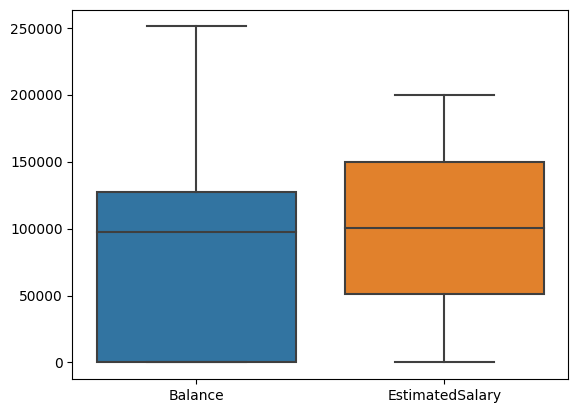

In [15]:
sns.boxplot(data=df[['Balance', 'EstimatedSalary']], orient='v')

<Axes: >

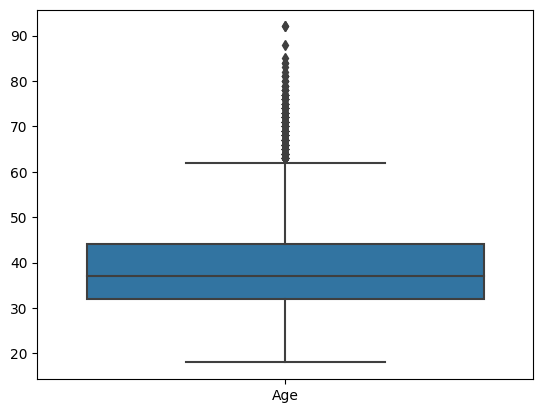

In [16]:
sns.boxplot(data=df[['Age']], orient='v')

O gráfico BoxPlot acima indica que temos outliers na coluna "Age", porém são outliers aceitáveis considerando a lógica do negócio, visto que não é nada improvável uma pessoa de 65-92 anos ter conta em um banco.

# 3. DataPreprocesing

Removar colunas que não serão utilizadas e renomear outras

In [17]:
df_engineer = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [18]:
df_engineer.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df_engineer = df_engineer.rename(columns={'Geography': 'Country', 'Exited' : 'Churn'})

In [20]:
df_engineer.columns

Index(['CreditScore', 'Country', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

# 4. EDA

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-21-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [22]:
country_counts = df_engineer['Country'].value_counts()

In [23]:
world = world.merge(country_counts, left_on='name', right_index=True)

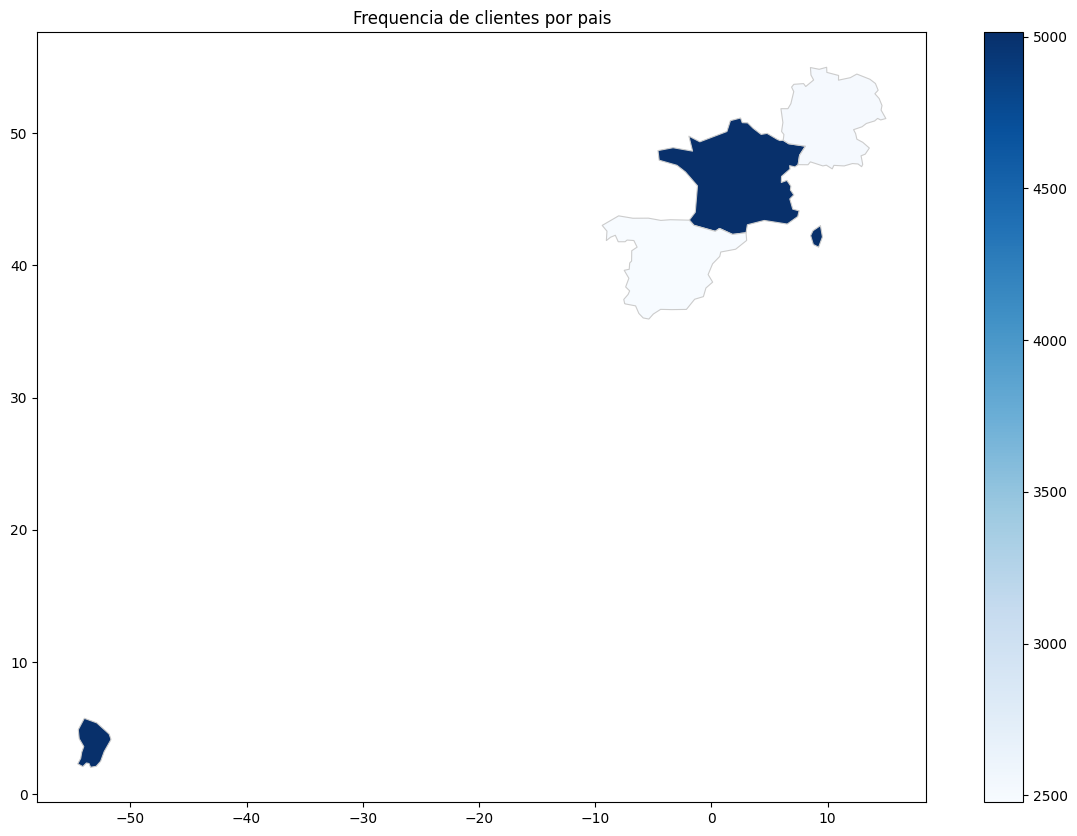

In [24]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
world.plot(column='Country', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Frequencia de clientes por pais")
plt.show()

In [25]:
df_engineer['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Podemos constatar que os clientes deste banco se limitam a Espanha, França e Alemanha e em suma maioria residem na França.

In [26]:
churn_frequencia_por_pais = df_engineer[df_engineer['Churn'] == 1]['Country'].value_counts()

In [27]:
print(churn_frequencia_por_pais)

Germany    814
France     810
Spain      413
Name: Country, dtype: int64


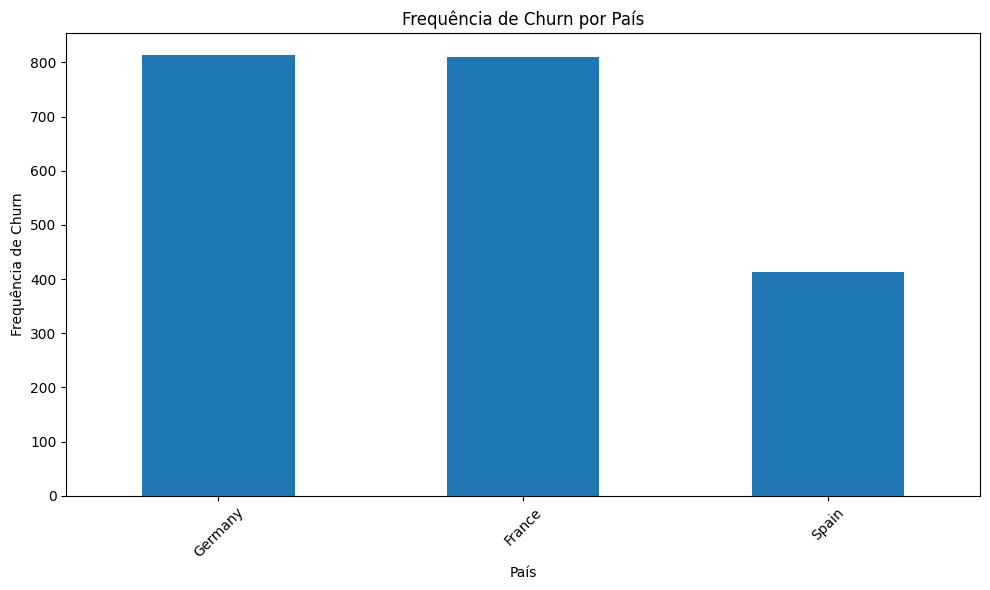

In [28]:
# Plotar este gráfico com seaborn
plt.figure(figsize=(10, 6))
churn_frequencia_por_pais.plot(kind='bar')
plt.title('Frequência de Churn por País')
plt.xlabel('País')
plt.ylabel('Frequência de Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df_engineer.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Country', ylabel='count'>

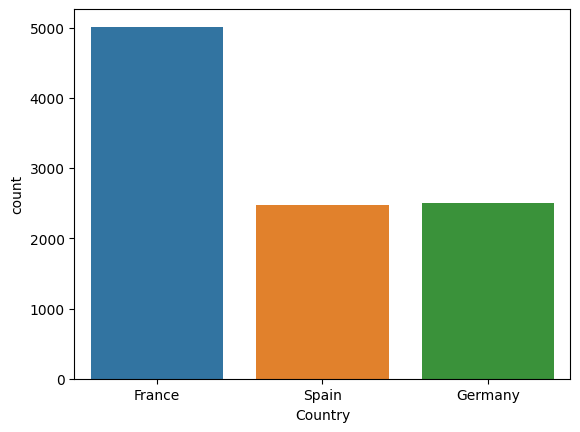

In [30]:
#Plotar um countplot para avaliar o numero total de clientes por país
sns.countplot(data=df_engineer, x='Country')

<Axes: xlabel='Balance', ylabel='Age'>

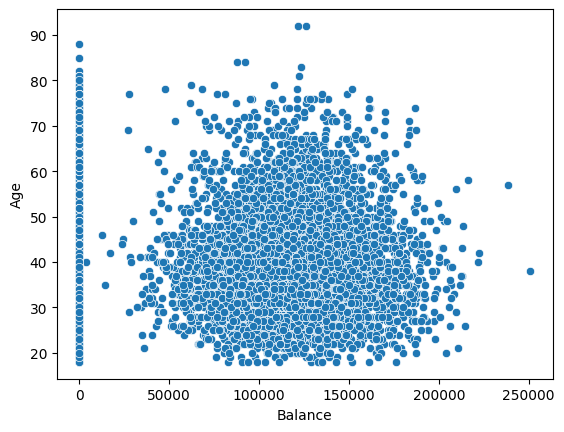

In [31]:
# Gráfico linear ou barplot de Idade VS Balance
sns.scatterplot(data=df_engineer, x='Balance', y='Age')

 A principio, não há linearidade entre Balance e idade

<Axes: xlabel='Age', ylabel='CreditScore'>

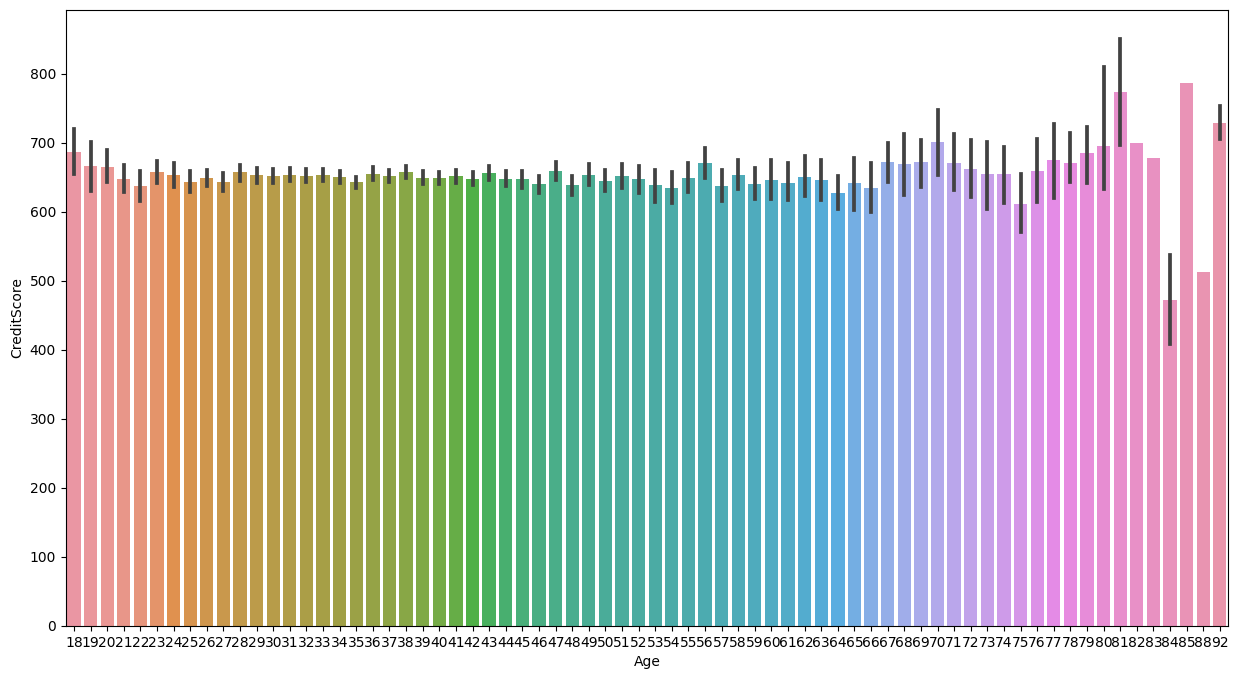

In [32]:
# Gráfico barplot de Idade VS Credit Score
plt.figure(figsize=(15,8))
sns.barplot(data=df_engineer, x='Age', y='CreditScore')

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

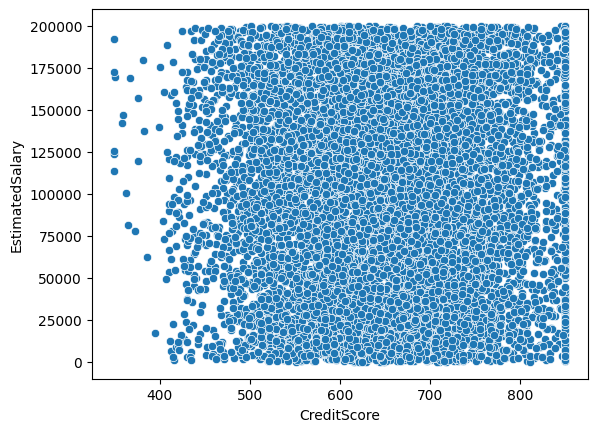

In [33]:
# Gráfico scatterplot de EstimatedSalary VS Credit Score
sns.scatterplot(data=df_engineer, x='CreditScore', y='EstimatedSalary')

<Axes: xlabel='Age', ylabel='IsActiveMember'>

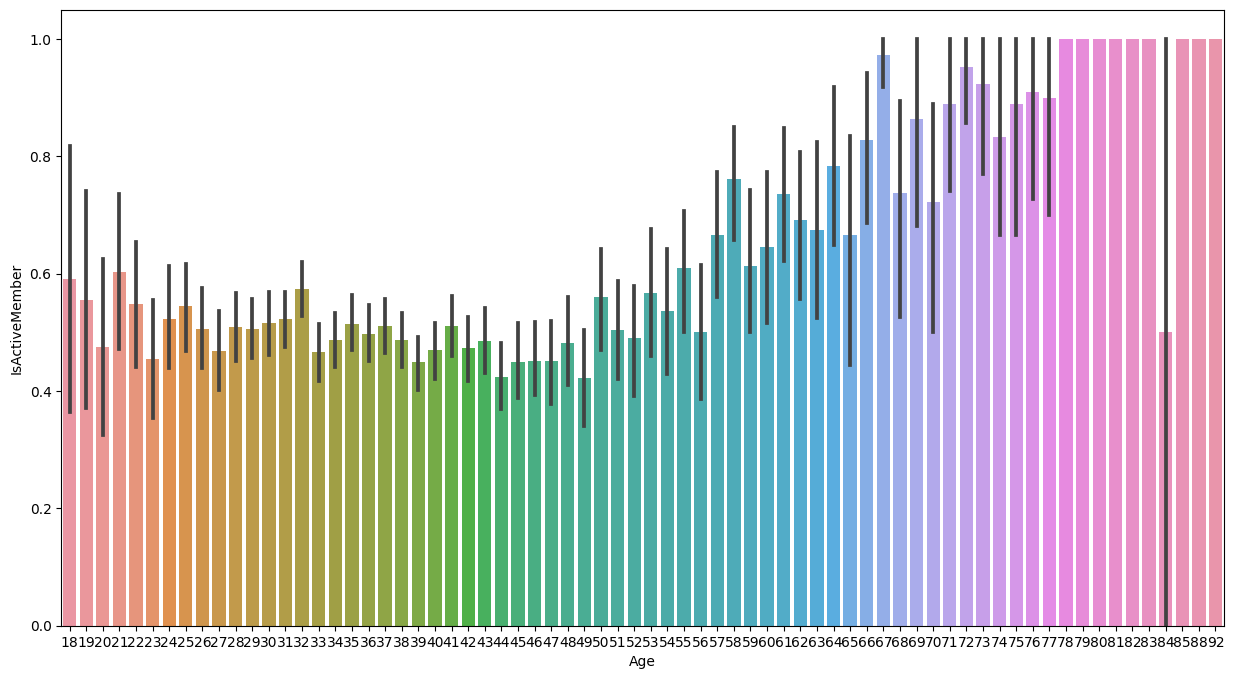

In [34]:
# Idade vs ActiveMember
plt.figure(figsize=(15,8))
sns.barplot(data=df_engineer, x='Age', y='IsActiveMember')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

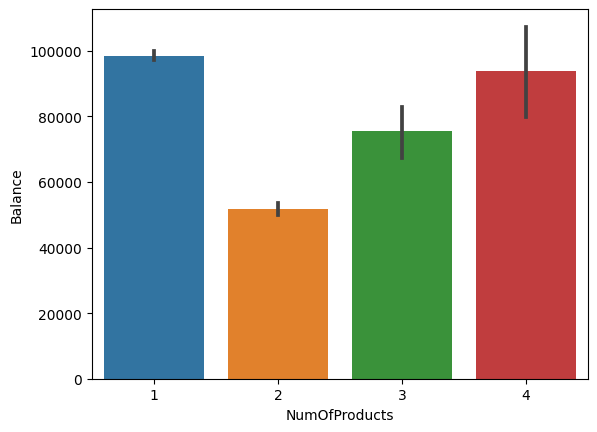

In [35]:
# Grafico barplot Balance vs NumOfProducts
sns.barplot(data=df_engineer, x='NumOfProducts', y='Balance')

<Axes: xlabel='Churn', ylabel='Tenure'>

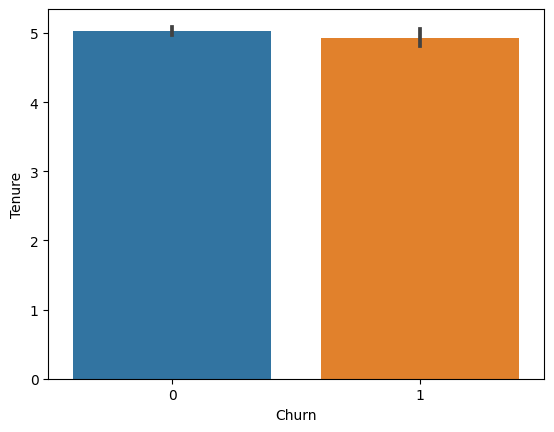

In [36]:
# Tenure vs Churn
sns.barplot(data=df_engineer, y='Tenure', x='Churn')

<Axes: xlabel='NumOfProducts', ylabel='Churn'>

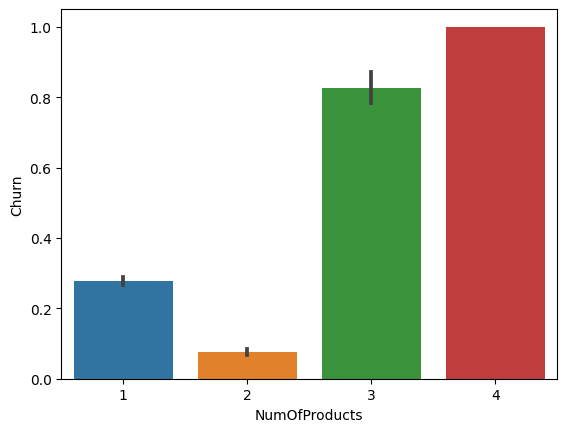

In [37]:
# NumOfProducts x Churn (Se o cliente tiver muitos produtos, pode ser uma insatisfação com o serviço)
sns.barplot(data=df_engineer, y='Churn', x='NumOfProducts')

Talvez seja interessante a dar mais suporte a quem tem mais produtos

<Axes: xlabel='Churn', ylabel='count'>

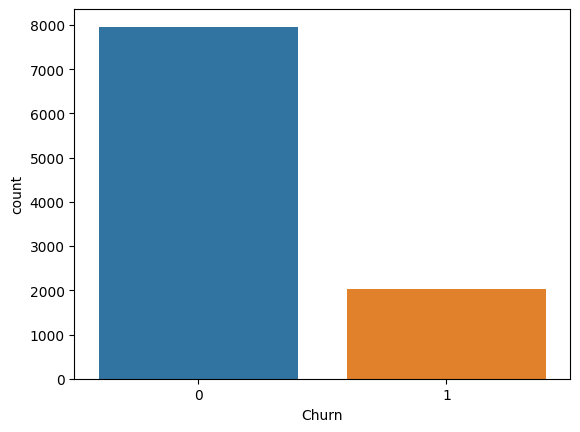

In [38]:
# Grafico countplot de churn para analisar balanceamento
sns.countplot(x=df_engineer['Churn'])

Os dados estão bem desbalanceados, é interessante fazer um tratamento de balanceamento

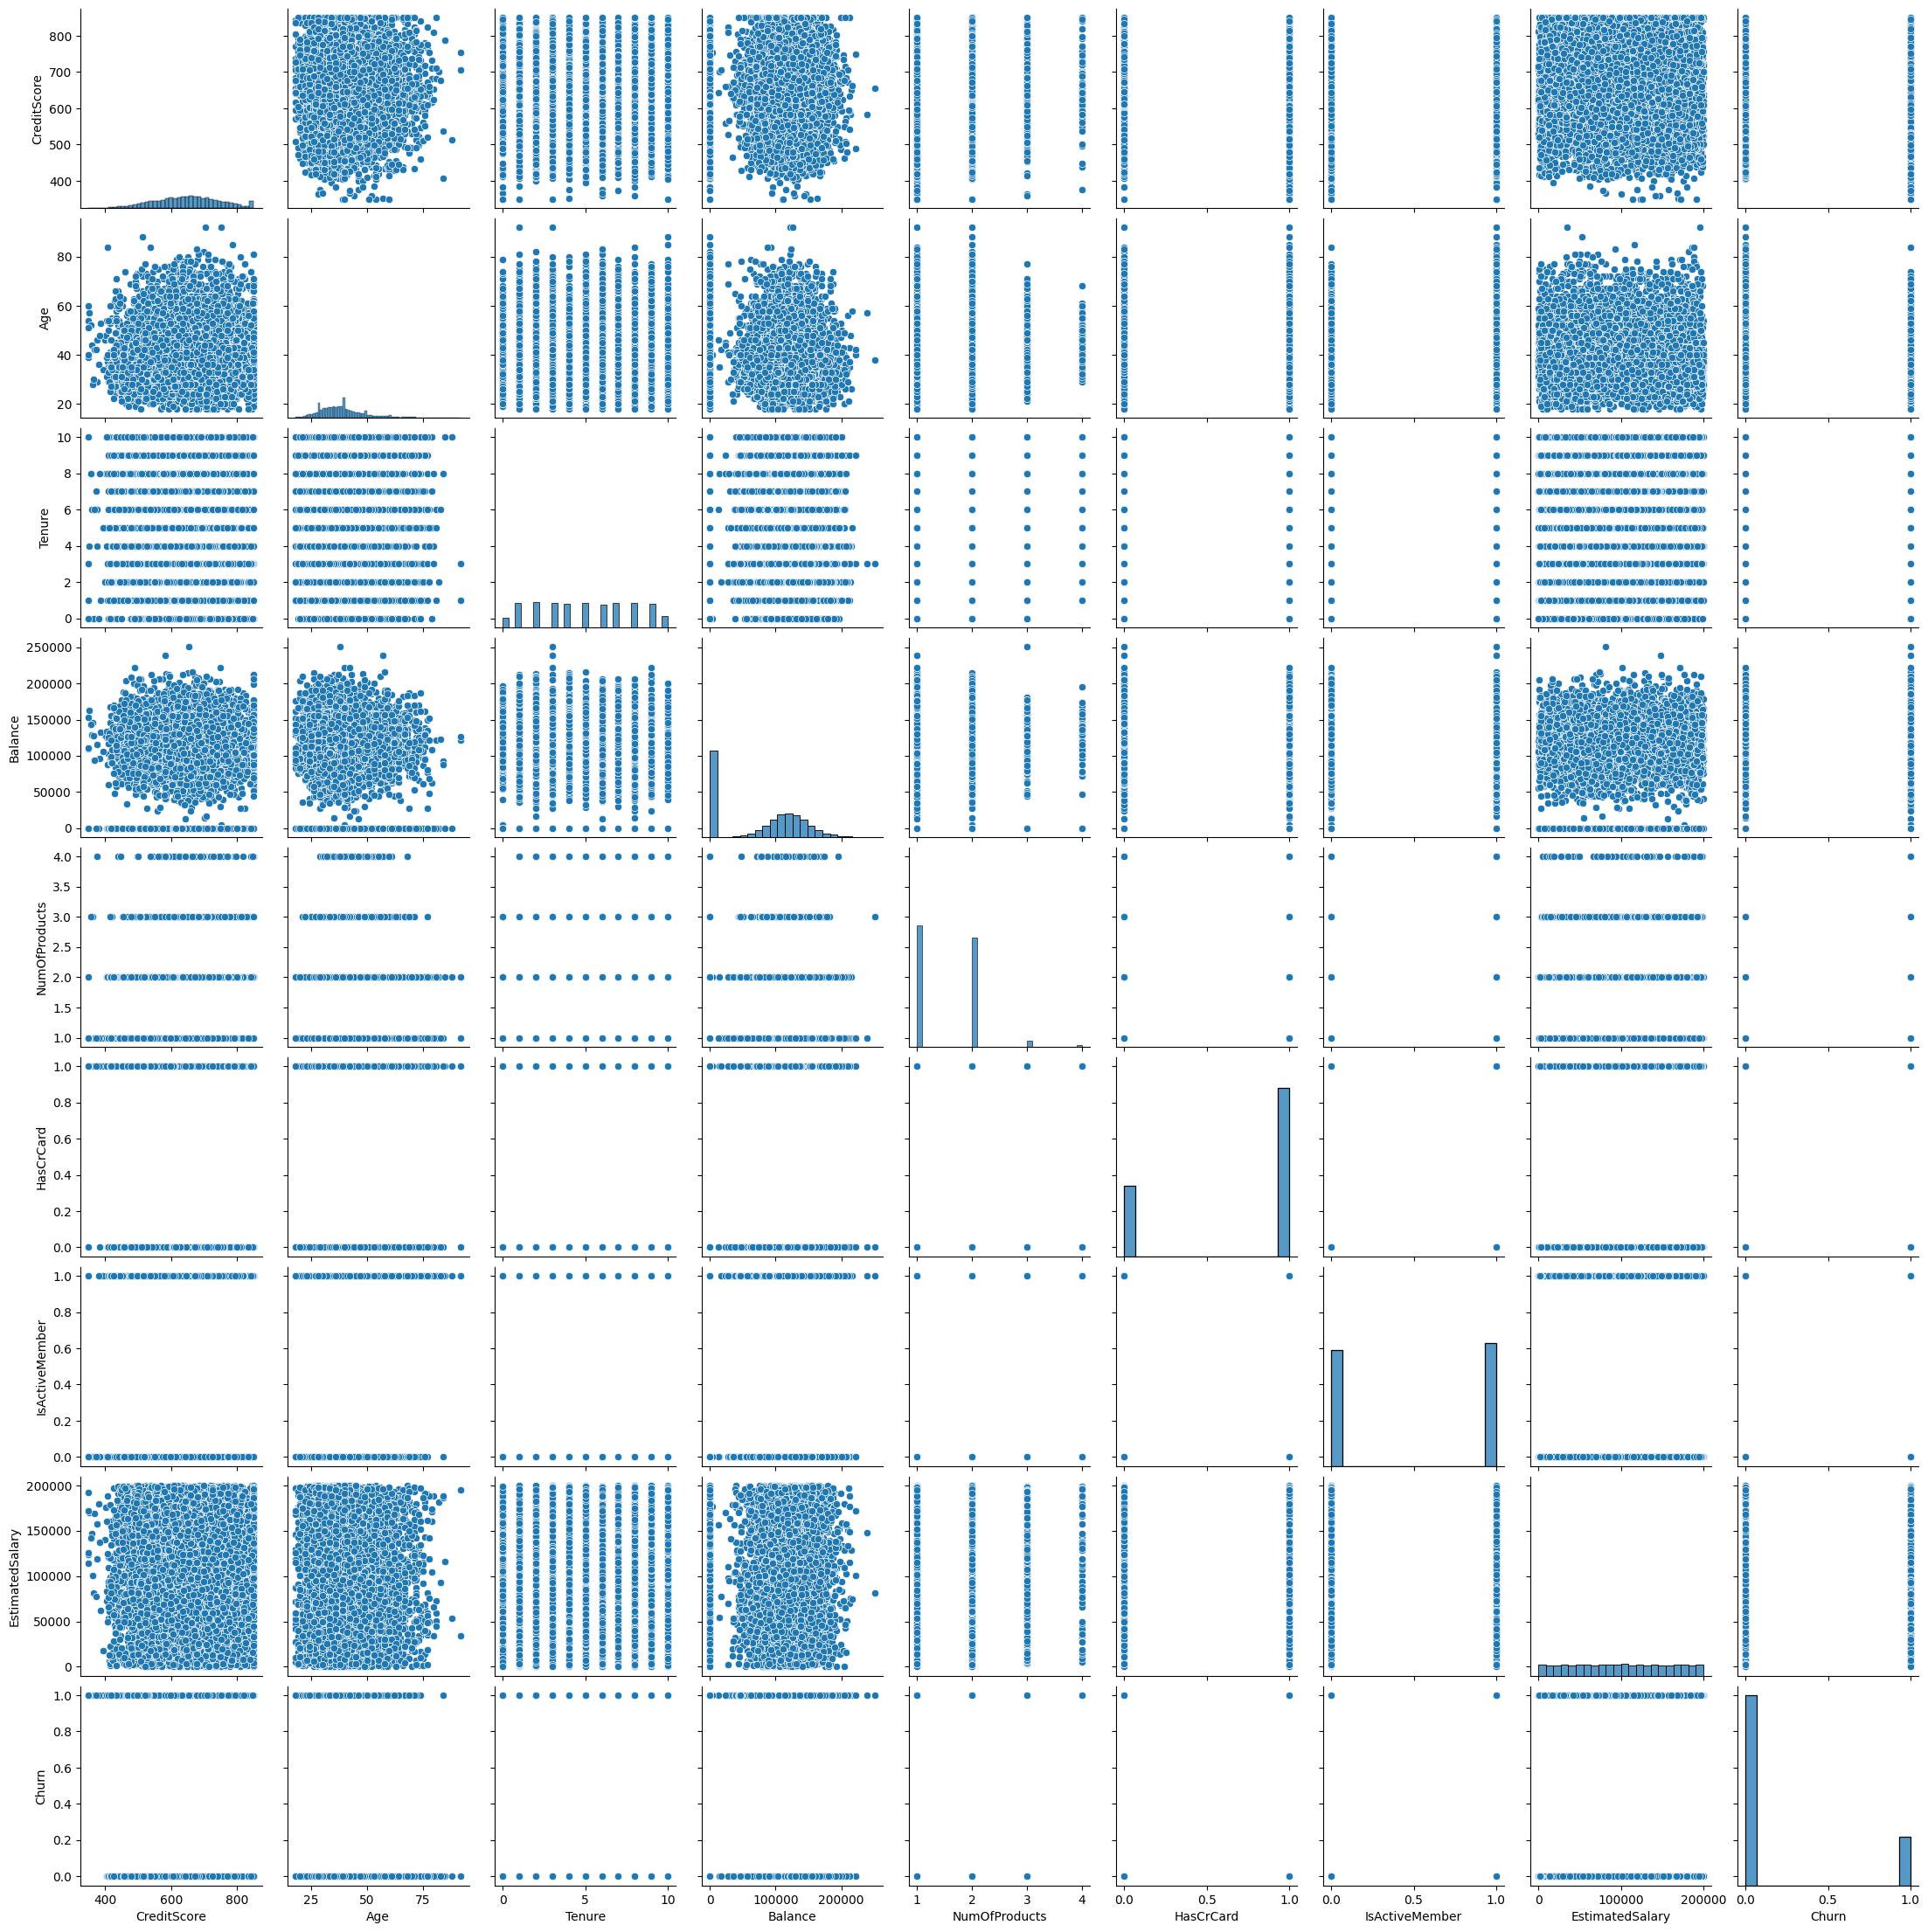

In [39]:
# Fazer um pairplot apenas para comparar os graficos com as analises realizadas anteriormente
sns.pairplot(data=df_engineer)

<Axes: >

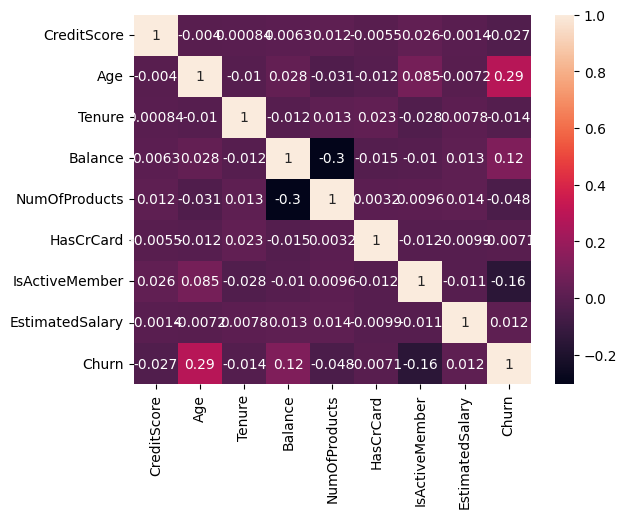

In [40]:
#Heatmap
sns.heatmap(df_engineer.drop(columns=['Country', 'Gender']).corr(), annot=True)

# 5. Data Preprocessing 2

In [41]:
#Removendo ambas as colunas categoricas, pois não serão utilizadas
df_clean = df_engineer.drop(columns=['Gender', 'Country'])

In [42]:
df_clean.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [43]:
X = df_clean.drop(columns=['Churn'], axis=1)
y = df_clean['Churn']

In [44]:
# Split dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(f'X_train: {X_train.shape} ; X_test: {X_test.shape}')
print(f'y_train: {y_train.shape} ; y_test: {y_test.shape}')

X_train: (7000, 8) ; X_test: (3000, 8)
y_train: (7000,) ; y_test: (3000,)


In [46]:
#Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [47]:
print(X_train_normalized)
print(X_test_normalized)

[[0.538      0.18918919 0.4        ... 1.         1.         0.86402732]
 [0.586      0.21621622 0.7        ... 0.         1.         0.94277771]
 [0.422      0.2027027  0.6        ... 0.         0.         0.86846977]
 ...
 [0.77       0.27027027 0.1        ... 0.         0.         0.46092526]
 [0.634      0.33783784 0.8        ... 1.         0.         0.48738065]
 [0.694      0.44594595 0.1        ... 1.         1.         0.26761502]]
[[0.492      0.18918919 0.3        ... 0.         0.         0.2089039 ]
 [0.546      0.33783784 0.1        ... 1.         1.         0.7319085 ]
 [0.502      0.35135135 0.4        ... 1.         0.         0.29277661]
 ...
 [0.518      0.18918919 0.7        ... 1.         1.         0.75963915]
 [0.46       0.17567568 0.2        ... 0.         1.         0.32004386]
 [0.366      0.05405405 1.         ... 0.         0.         0.21922329]]


In [48]:
# balancear dados? Pesquisar em quais circunstancias realizar o oversampling, exemplo, qual deve ser a
# diferença de proporção dos dados

In [49]:
df_clean['Churn'].value_counts() / df_clean.shape[0] * 100

0    79.63
1    20.37
Name: Churn, dtype: float64

Optei por não realizar o balanceamento para que o modelo fique o mais fiel e original possível, caso o "não-balanceamento" implique no resultado final do modelo, voltarei e realizarei o desbalanceamento

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('ADABoost Classifier', AdaBoostClassifier())
]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [56]:
results = []
for name, model in models:
  pipe = Pipeline([
      ('model',model)
  ])

  param_grid = {}
  if name == 'Logistic Regression':
    param_grid = {'model__C':[100, 10, 1.0, 0.1], 'model__solver':['newton-cg', 'lbfgs', 'liblinear']}
  elif name == 'Random Forest Classifier':
    param_grid = {'model__n_estimators':[10, 100, 500], 'model__max_features':['sqrt', 'log2']}
  elif name == 'Decision Tree Classifier':
    param_grid = {'model__max_features':['sqrt', 'log2'], 'model__max_depth':[3, 6, 12]}

  grid_search = GridSearchCV(pipe, param_grid, cv=5)
  grid_search.fit(X_train_normalized, y_train)

  y_pred = grid_search.predict(X_test_normalized)
  accuracy = accuracy_score(y_test, y_pred)

  results.append((name, grid_search.best_params_, accuracy))

In [57]:
for name, best_params, accuracy in results:
  print(f'Model: {name}')
  print(f'Best Parameters: {best_params}')
  print(f'Accuracy: {accuracy:.2f}\n')

Model: Logistic Regression
Best Parameters: {'model__C': 1.0, 'model__solver': 'liblinear'}
Accuracy: 0.81

Model: Random Forest Classifier
Best Parameters: {'model__max_features': 'sqrt', 'model__n_estimators': 500}
Accuracy: 0.86

Model: Decision Tree Classifier
Best Parameters: {'model__max_depth': 6, 'model__max_features': 'log2'}
Accuracy: 0.85

Model: XGB Classifier
Best Parameters: {}
Accuracy: 0.85

Model: ADABoost Classifier
Best Parameters: {}
Accuracy: 0.85



In [58]:
random_forest = RandomForestClassifier(n_estimators=500, max_features='sqrt')

In [59]:
random_forest.fit(X_train_normalized, y_train)

RandomForestClassifier(n_estimators=500)

In [60]:
y_pred = random_forest.predict(X_test_normalized)

In [61]:
accuracy = accuracy_score( y_test, y_pred)
print("Acurácia: ", accuracy)

Acurácia:  0.857


In [62]:
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [63]:
conf_rf = confusion_matrix(y_test, y_pred)

def conf_matrix(x):
    plt.figure(dpi=125)
    class_labels = ['Classe 0', 'Classe 1']
    sns.heatmap(x, annot=True, fmt='d', cmap=plt.cm.Blues, square=True, xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predicted churn')
    plt.ylabel('Actual churn')

Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

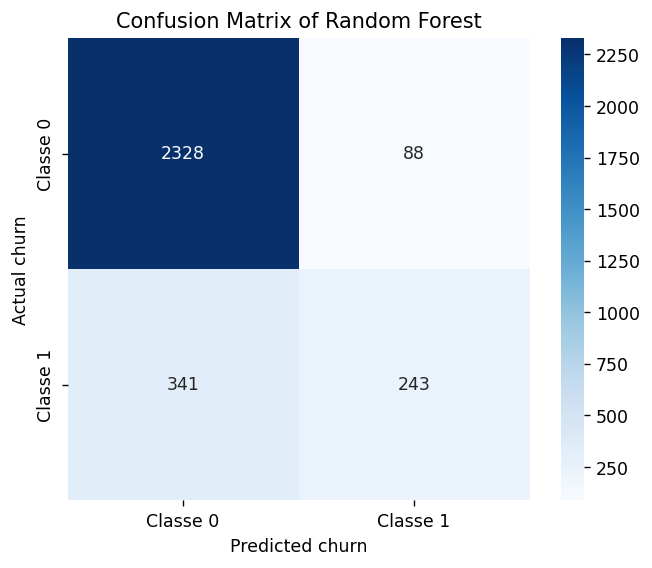

In [64]:
conf_matrix(conf_rf)
plt.title('Confusion Matrix of Random Forest')

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [66]:
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("F1-score Random Forest:", f1)
print("Precision RF:", precision)
print("Recall RF:", recall)

F1-score Random Forest: 0.7233908796363461
Precision RF: 0.803187882807981
Recall RF: 0.6898360246756782


In [67]:
import pickle

In [68]:
pickle.dump(random_forest, open('saved_churn_rf_model.pkl', 'wb'))